In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

### Inputs

In [2]:
# Read observed sca
sca = pd.read_csv('HYPE_SCA', sep=' ', index_col=0)

In [3]:
sca

,58219,58241,58237,58232,58214,58233,58213,58223,58221,58216,...,58448,58380,58342,58582,58405,58610,58389,58570,58579,58465
datetime,,,,,,,,,,,,,,,,,,,,,
2002-07-04,0.069929,0.000000,0.000000,0.000000,0.014059,0.000000,0.0,0.008473,0.000000,0.049473,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
2002-07-05,0.278127,0.359946,0.608275,0.444227,0.035810,0.364286,0.0,0.153291,0.109535,0.265214,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
2002-07-06,0.163252,0.446060,0.710294,0.092380,0.018791,0.329780,0.0,0.140699,0.000000,0.172948,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
2002-07-07,0.400748,0.596167,0.978750,0.337101,0.067345,0.459770,0.0,0.317924,0.157710,0.382561,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
2002-07-08,0.397154,0.596167,0.978750,0.337101,0.078228,0.434187,0.0,0.317924,0.157710,0.382561,...,0.009555,0.0,0.0,0.0,0.002148,0.0,0.0,0.020941,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,0.916190,0.905095,1.000000,1.000000,0.961443,0.953759,1.0,0.966056,0.999920,0.979500,...,0.867982,1.0,1.0,1.0,0.994287,1.0,1.0,1.000000,1.0,1.00000
2015-12-28,0.916826,0.905095,1.000000,1.000000,0.961443,0.953759,1.0,0.966056,0.999920,0.979500,...,0.867982,1.0,1.0,1.0,0.994287,1.0,1.0,1.000000,1.0,1.00000
2015-12-29,0.916826,0.905095,1.000000,1.000000,0.961443,0.953759,1.0,0.966056,0.999920,0.979500,...,0.867982,1.0,1.0,1.0,0.994287,1.0,1.0,1.000000,1.0,1.00000


In [4]:
# read hype sca
hype = pd.read_csv('../../model/results/timeCFSC_DD.txt', sep='\t',skiprows=1, index_col=0)

In [5]:
# read modified shapefile
gdf = gpd.read_file('../../geospacial/shapefiles/modified_shapefiles/Modified_SMMcat.shp')

### Analysis

In [6]:
# Rename the index name to None (no name)
hype.index.name = None
sca.index.name = None

In [7]:
# Set the headers to integers skipping the index header
hype.columns = hype.columns.astype(int)
sca.columns = sca.columns.astype(int)

In [8]:
# Convert index to datetime for hype DataFrame
hype.index = pd.to_datetime(hype.index)

# Convert index to datetime for sca DataFrame
sca.index = pd.to_datetime(sca.index)

In [9]:
# Trim hype DataFrame to have matching index as sca
hype = hype.reindex(sca.index)

In [10]:
# Sort the columns of hype DataFrame to match the order of columns in sca
hype = hype.reindex(sorted(sca.columns), axis=1)

In [11]:
# Get the columns of `sca` DataFrame and use them to reorder columns of `hype` DataFrame
hype = hype.reindex(columns=sca.columns)

In [12]:
# Create a new DataFrame `difference` by subtracting `sca` from `hype`
# change this operation to whatever you want
difference= ((hype - sca) ** 2).mean()

In [13]:
difference

58219    0.032114
58241    0.056380
58237    0.099281
58232    0.061929
58214    0.057104
           ...   
58610    0.085009
58389    0.081334
58570    0.088577
58579    0.107155
58465    0.074160
Length: 473, dtype: float64

# Calculate the mean of each column in the difference DataFrame
column_means = difference.mean()

In [14]:
# Convert difference Series to a DataFrame
column_means_df = pd.DataFrame(difference, columns=['Mean'])

In [15]:
column_means_df

,Mean
58219,0.032114
58241,0.056380
58237,0.099281
58232,0.061929
58214,0.057104
...,...
58610,0.085009
58389,0.081334
58570,0.088577
58579,0.107155


### Plot a heatmap

In [16]:
# Merge column_means_df onto gdf by the index in column_means_df and seg_nhm column in gdf
merged_gdf = gdf.merge(column_means_df, left_on='seg_nhm', right_index=True)

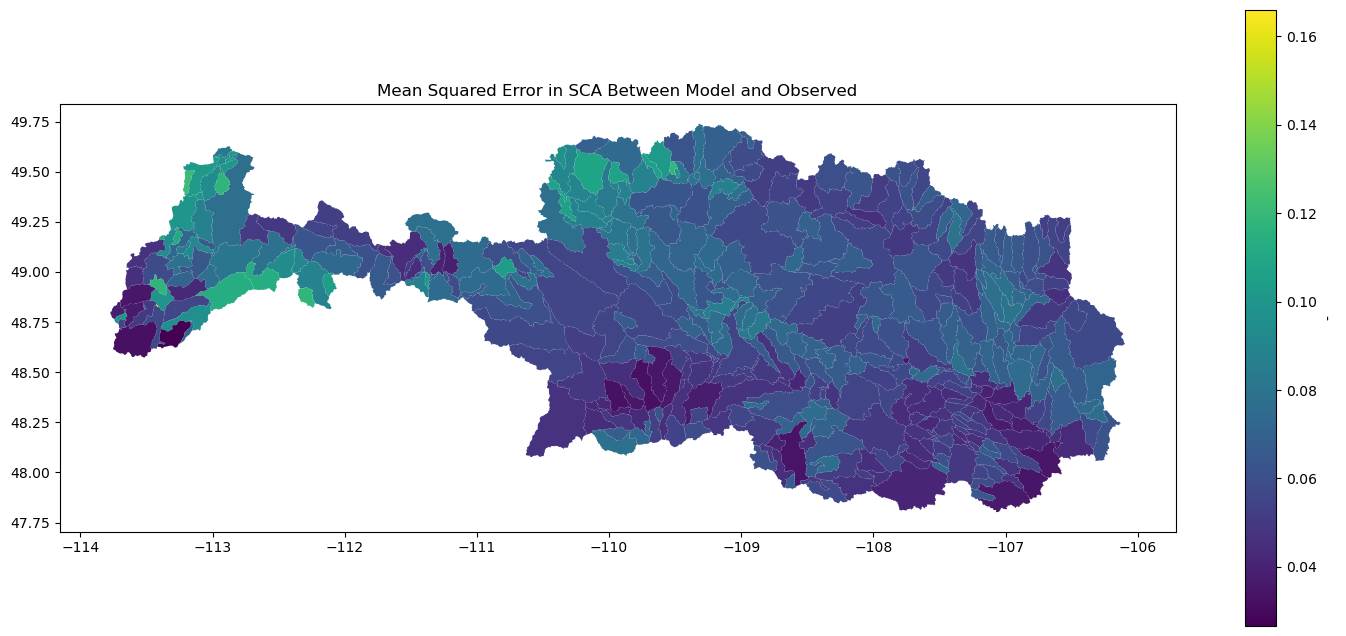

In [35]:
# Plot a heatmap of the 'Mean' column with adjusted figure size
ax = merged_gdf.plot(column='Mean', cmap='viridis', legend=True, figsize=(18, 8))

# Add title to the plot
ax.set_title('Mean Squared Error in SCA Between Model and Observed')

# Get the color bar instance
cbar = ax.get_figure().get_axes()[1]

# Add units to the color bar
cbar.set_ylabel('-')

# Save the plot as PNG to a specific location
plt.savefig('../../model/plots/sca.png')

# Show the plot
plt.show()

### MSE

In [18]:
# Align the indices and columns
common_index = hype.index.intersection(sca.index)
common_columns = hype.columns.intersection(sca.columns)

# Extract the common data
hype_common = hype.loc[common_index, common_columns]
sca_common = sca.loc[common_index, common_columns]

# Calculate mean squared error
mse = ((hype_common - sca_common) ** 2).mean().mean()

# Print the mean squared error
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0643223099964251
